In [1]:
# General Data Processing and Visualization Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras import layers, metrics
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [2]:
# Visualization Tools
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def make_vis(model_clf,train,val):
  viz = ClassificationReport(model_clf, classes=['0', '1'], support = True)
  viz.fit(train, np.ravel(label_train))
  viz.score(val, np.ravel(label_val))
  viz.poof()

def make_cmatrix(predictions,clf_name):
  cm = confusion_matrix(label_val, predictions)
  cm_display = ConfusionMatrixDisplay(cm,display_labels=['Normal','Fraud'])
  cm_display.plot(values_format='d')
  plt.title("Confusion Matrix: "+clf_name)
  plt.grid(False)
  plt.show()

In [3]:
data_raw = pd.read_csv('../data/creditcard.csv', sep=",")

In [4]:
data_only = data_raw.drop(["Class"],axis=1)
labels_only = data_raw.take([-1],axis=1)

In [5]:
from sklearn.model_selection import train_test_split
train_raw, val_raw, label_train, label_val = train_test_split(data_only, labels_only,\
                                                                stratify=labels_only,\
                                                                test_size = 0.2,\
                                                               random_state = 255)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_raw)
scaled_train = scaler.transform(train_raw)
scaled_val = scaler.transform(val_raw)

from sklearn.preprocessing import MinMaxScaler
minmaxScaler = MinMaxScaler()
minmax_train = minmaxScaler.fit_transform(train_raw)
minmax_val = minmaxScaler.transform(val_raw)

## Keras Simple

In [7]:
def make_model(input_data):
    model = keras.Sequential()
    model.add(layers.Dense(256, activation="relu", input_shape=(input_data.shape[-1],)))
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.summary()
    return model

In [8]:
standard_scaled = make_model(scaled_train)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               7936      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 49,153
Trainable params: 49,153
Non-trainable params: 0
__________________________________________________

In [9]:
my_metrics = [metrics.Precision(name="precision"), metrics.Recall(name="recall")]

In [10]:
standard_scaled.compile(optimizer="Adam", loss="binary_crossentropy", metrics=my_metrics)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
train_hist_0 = standard_scaled.fit(scaled_train,label_train, epochs = 10, validation_data=(scaled_val,label_val))


Train on 227845 samples, validate on 56962 samples
Epoch 1/10
227845/227845 [==============================] - 21s 90us/step - loss: 0.0058 - precision: 0.8144 - recall: 0.6904 - val_loss: 0.0040 - val_precision: 0.8182 - val_recall: 0.8265
Epoch 2/10
227845/227845 [==============================] - 18s 81us/step - loss: 0.0038 - precision: 0.8543 - recall: 0.7589 - val_loss: 0.0037 - val_precision: 0.8438 - val_recall: 0.8265
Epoch 3/10
227845/227845 [==============================] - 16s 68us/step - loss: 0.0035 - precision: 0.8836 - recall: 0.7132 - val_loss: 0.0039 - val_precision: 0.8316 - val_recall: 0.8061
Epoch 4/10
227845/227845 [==============================] - 16s 71us/step - loss: 0.0032 - precision: 0.9021 - recall: 0.7487 - val_loss: 0.0041 - val_precision: 0.8511 - val_recall: 0.8163
Epoch 5/10
227845/227845 [==============================] - 19s 83us/step - loss: 0.0029 - precision: 0.8988 - recall: 0.7437 - val_loss: 0.0042 - val_precision: 0.8721 - val_recall: 0.765

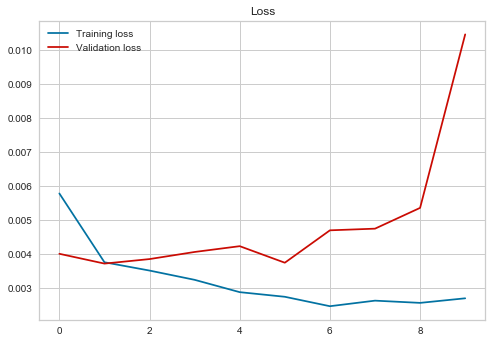

In [12]:
hist_loss = train_hist_0.history['loss']
hist_val_loss = train_hist_0.history['val_loss']
epochs_x = range(len(hist_loss))

plt.figure()

plt.plot(epochs_x, hist_loss, 'b', label='Training loss')
plt.plot(epochs_x, hist_val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()

plt.show()

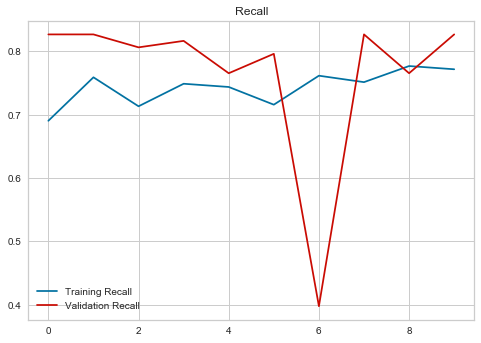

In [13]:
hist_recall = train_hist_0.history['recall']
hist_val_recall = train_hist_0.history['val_recall']
epochs_x = range(len(hist_loss))

plt.figure()

plt.plot(epochs_x, hist_recall, 'b', label='Training Recall')
plt.plot(epochs_x, hist_val_recall, 'r', label='Validation Recall')
plt.title('Recall')
plt.legend()

plt.show()

In [14]:
prediction_s = standard_scaled.predict_classes(scaled_val)

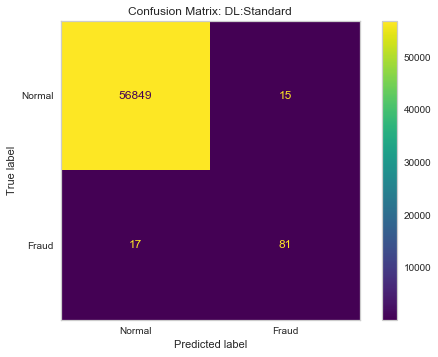

In [15]:
make_cmatrix(prediction_s,"DL:Standard")

In [16]:
print(classification_report(label_val, prediction_s))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.83      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



# Results

Results about equal to Trees, however can only be done on min-max scaled data